## Testing out the Slidwing Window (SW) Implementation in ASDETECT

/home/lukasro/Documents/TIPMIP/toad/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


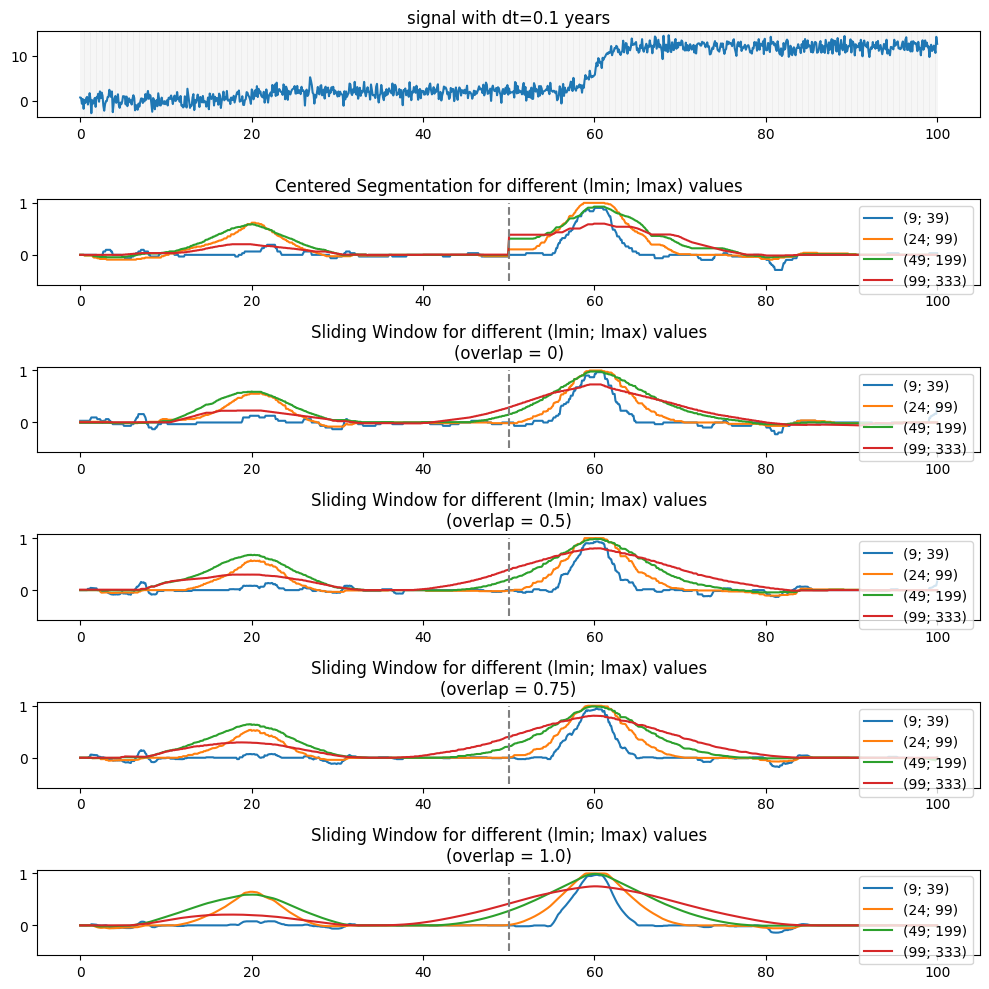

In [1]:
import toad 
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt

from toad.shifts.methods.asdetect import ASDETECT
from toad.shifts.methods.asswdetect import ASSWDETECT

def shift(mag, t, t0):
    return mag * (1/(1 + np.exp(-(t-t0))))

# Do the following for two different time resolutions to show that lmin, lmax 
# are inferred/adapted correctly 
 
dt = 0.1
Tmax = 100 # years
nT = int(Tmax/dt) # number of gridpoints in time

# SIGNAL GENERATION =======================================================
noise = np.random.normal(size=nT)
time = np.linspace(0,Tmax, nT)

signal = (noise 
            + shift(10, time, 60)
            + shift(2,time,20)   
        )

# PLOT: SIGNAL ============================================================
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(ncols=1, nrows=6)
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(time, signal)
for t in time:
    ax1.axvline(t, color='grey', alpha=0.1, lw=0.5, zorder=-1)
ax1.set_title(f'signal with dt={dt} years')

# PLOT: CENTERED SEGMENTATION ==========================
ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)
for lmin, lmax in [(9,39),(24,99),(49,199),(99,333)]:
    detector = ASDETECT(
        lmin=lmin,
        lmax=lmax,)
    dts = detector.fit_predict(
        signal,
        time,
        )

    ax2.plot(time, dts, label=f'({lmin}; {lmax})')
ax2.vlines(x=Tmax//2, ymin=-0.5, ymax=1, color='grey', linestyles='--')
ax2.set_title('Centered Segmentation for different (lmin; lmax) values')
ax2.legend()

# PLOT: SLIDING WINDOW ==========================
overlap = 0
ax3 = fig.add_subplot(gs[2, 0], sharex=ax1)
for lmin, lmax in [(9,39),(24,99),(49,199),(99,333)]:
    detector = ASSWDETECT(
        lmin=lmin,
        lmax=lmax,
        overlap=overlap
    )
    dts = detector.fit_predict(
        signal,
        time,
        )

    ax3.plot(time, dts, label=f'({lmin}; {lmax})')
ax3.vlines(x=Tmax//2, ymin=-0.5, ymax=1, color='grey', linestyles='--')
ax3.set_title(f'Sliding Window for different (lmin; lmax) values\n(overlap = {overlap})')
ax3.legend()

# PLOT: SLIDING WINDOW ==========================
overlap = 0.5
ax4 = fig.add_subplot(gs[3, 0], sharex=ax1)
for lmin, lmax in [(9,39),(24,99),(49,199),(99,333)]:
    detector = ASSWDETECT(
        lmin=lmin,
        lmax=lmax,
        overlap=overlap,
    )
    dts = detector.fit_predict(
        signal,
        time,
        )

    ax4.plot(time, dts, label=f'({lmin}; {lmax})')
ax4.vlines(x=Tmax//2, ymin=-0.5, ymax=1, color='grey', linestyles='--')
ax4.set_title(f'Sliding Window for different (lmin; lmax) values\n(overlap = {overlap})')
ax4.legend()


# PLOT: SLIDING WINDOW ==========================
overlap = 0.75
ax5 = fig.add_subplot(gs[4, 0], sharex=ax1)
for lmin, lmax in [(9,39),(24,99),(49,199),(99,333)]:
    detector = ASSWDETECT(
        lmin=lmin,
        lmax=lmax,
        overlap=overlap,
    )
    dts = detector.fit_predict(
        signal,
        time,
        )

    ax5.plot(time, dts, label=f'({lmin}; {lmax})')
ax5.vlines(x=Tmax//2, ymin=-0.5, ymax=1, color='grey', linestyles='--')
ax5.set_title(f'Sliding Window for different (lmin; lmax) values\n(overlap = {overlap})')
ax5.legend()

# PLOT: SLIDING WINDOW ==========================
overlap = 1.0
ax6 = fig.add_subplot(gs[5, 0], sharex=ax1)
for lmin, lmax in [(9,39),(24,99),(49,199),(99,333)]:
    detector = ASSWDETECT(
        lmin=lmin,
        lmax=lmax,
        overlap=overlap,
    )
    dts = detector.fit_predict(
        signal,
        time,
        )

    ax6.plot(time, dts, label=f'({lmin}; {lmax})')
ax6.vlines(x=Tmax//2, ymin=-0.5, ymax=1, color='grey', linestyles='--')
ax6.set_title(f'Sliding Window for different (lmin; lmax) values\n(overlap = {overlap})')
ax6.legend()


plt.tight_layout()
plt.show()

## Check Sliding Steps

In [1]:
import toad 
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt

from toad.shifts.methods.asdetect import ASDETECT
from toad.shifts.methods.asswdetect import ASSWDETECT

def shift(mag, t, t0):
    return mag * (1/(1 + np.exp(-(t-t0))))

def make_normalization_plot(counter, lmin, lmax, overlap):
    """Make a plot showing how often each point was counted in the detection time series.

    This is useful to understand the normalization of the detection time series.

    >> Args:
        counter:
            1D array of counts, shape (n,)
        lmin:
            Smallest segment length
        lmax:
            Largest segment length
        overlap:
            Relative overlap between segments
    """
    plt.figure(figsize=(10, 4))
    plt.plot(counter, label='Count of how often each point was included in a segment')
    plt.xlabel('Time index')
    plt.ylabel('Count')
    plt.title(f'Normalization Counter (lmin={lmin}, lmax={lmax}, overlap={overlap})')
    plt.legend()
    plt.grid()
    plt.show()

# Do the following for two different time resolutions to show that lmin, lmax 
# are inferred/adapted correctly 
 
dt = 1
Tmax = 100 # years
nT = int(Tmax/dt) # number of gridpoints in time

# SIGNAL GENERATION =======================================================
noise = np.random.normal(size=nT)
time = np.linspace(0,Tmax, nT)

signal = (noise 
            + shift(10, time, 60)
            + shift(2,time,20)   
        )

/home/lukasro/Documents/TIPMIP/toad/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


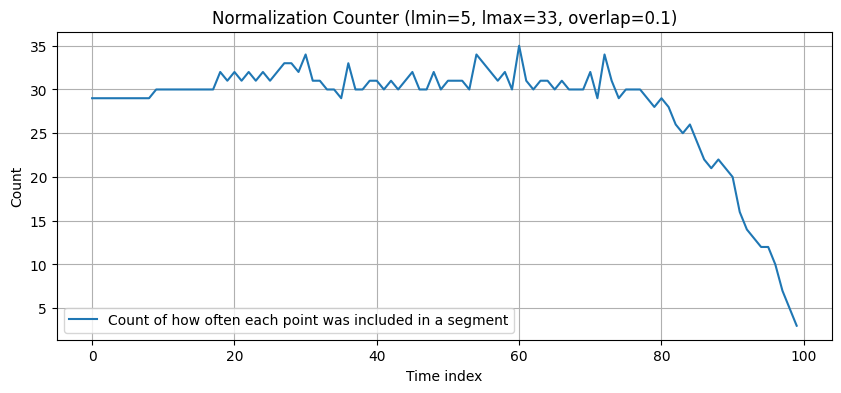

In [ ]:
# new ASSWDETECT method

lmin = 5
lmax = nT//3
overlap = 0.1

# Computation
detector = ASSWDETECT(
    lmin=lmin,
    lmax=lmax,
    overlap=overlap,
)
dts = detector.fit_predict(
    signal,
    time,t
    return_counter=True,
    #verbose=True,
)

make_normalization_plot(dts, lmin, lmax, overlap=overlap)

## Compare Computation Time

In [2]:
import toad 
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt

from toad.shifts.methods.asdetect import ASDETECT
from toad.shifts.methods.asswdetect import ASSWDETECT

def shift(mag, t, t0):
    return mag * (1/(1 + np.exp(-(t-t0))))

# Do the following for two different time resolutions to show that lmin, lmax 
# are inferred/adapted correctly 
 
dt = 0.1
Tmax = 100 # years
nT = int(Tmax/dt) # number of gridpoints in time

lmin = 5
lmax = nT//3

# SIGNAL GENERATION =======================================================
noise = np.random.normal(size=nT)
time = np.linspace(0,Tmax, nT)

signal = (noise 
            + shift(10, time, 60)
            + shift(2,time,20)   
        )

In [3]:
# old ASDETECT method

# Computation
detector = ASDETECT(
    lmin=lmin,
    lmax=lmax,)
dts = detector.fit_predict(
    signal,
    time,
    )
        

In [4]:
# new ASSWDETECT method

# Computation
detector = ASSWDETECT(
    lmin=lmin,
    lmax=lmax,
    overlap=1,
)
dts = detector.fit_predict(
    signal,
    time,
)

In [4]:
import numpy as np
import xarray as xr
from toad import TOAD

# load example dataset
data = xr.open_dataset("tutorials/test_data/garbe_2020_antarctica.nc")
data = data.drop_vars(["lat", "lon"])  # drop lat/lon to use the native coordinates

# lower the resolution to speed up computation
data = data.coarsen(x=10, y=10, time=2, boundary="trim").reduce(np.mean)
td = TOAD(data)

In [6]:
from toad.shifts import ASDETECT

td.compute_shifts("thk", method=ASDETECT(), overwrite=True)

INFO: Applying detector ASDETECT to thk


In [8]:
from toad.shifts.methods.asdetect import ASDETECT

td.compute_shifts("thk", method=ASDETECT(), overwrite=True)

INFO: Applying detector ASDETECT to thk


In [23]:
from toad.shifts.methods.asswdetect import ASSWDETECT

td.compute_shifts("thk", method=ASSWDETECT(overlap=0.1), overwrite=True)

INFO: Applying detector ASSWDETECT to thk


In [28]:
fp = "benchmark_results.csv"

import pandas as pd

df = pd.read_csv(fp)

display(df)

method  run  overlap      time
0     ASDETECT    1      NaN  0.908965
1     ASDETECT    2      NaN  1.018827
2     ASDETECT    3      NaN  1.013829
3   ASSWDETECT    1     0.00  0.896889
4   ASSWDETECT    2     0.00  0.955356
5   ASSWDETECT    3     0.00  1.001442
6   ASSWDETECT    1     0.10  1.061482
7   ASSWDETECT    2     0.10  1.064375
8   ASSWDETECT    3     0.10  1.053238
9   ASSWDETECT    1     0.25  1.234635
10  ASSWDETECT    2     0.25  1.202831
11  ASSWDETECT    3     0.25  1.222410
12  ASSWDETECT    1     0.50  1.899217
13  ASSWDETECT    2     0.50  1.749648
14  ASSWDETECT    3     0.50  1.760704
15  ASSWDETECT    1     0.75  3.052039
16  ASSWDETECT    2     0.75  2.913551
17  ASSWDETECT    3     0.75  3.124122

## Double Sliding Window

As SW always starts at the beginning of the time series, the values in the end will be used not as often. The idea now is, to do SW once from the front and once from the back to compensate for this inequality.

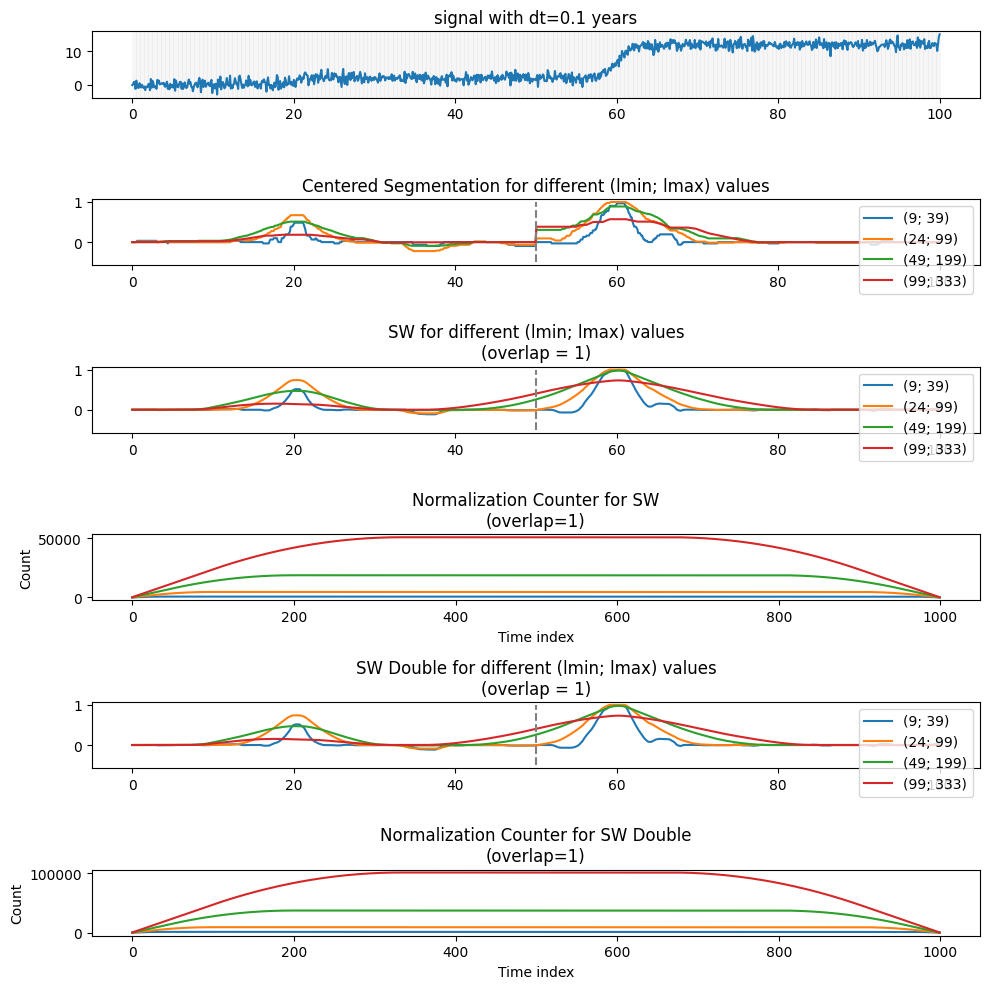

In [215]:
import toad 
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt

from toad.shifts.methods.asdetect import ASDETECT
from toad.shifts.methods.asswdetect import ASSWDETECT
from toad.shifts.methods.asswdetect_double import ASSWDETECT as ASSWDETECT_DOUBLE

def shift(mag, t, t0):
    return mag * (1/(1 + np.exp(-(t-t0))))

# Do the following for two different time resolutions to show that lmin, lmax 
# are inferred/adapted correctly 
 
dt = 0.1
Tmax = 100 # years
nT = int(Tmax/dt) # number of gridpoints in time
overlap = 1
l_tuple = [(9,39),(24,99),(49,199),(99,333)]

# SIGNAL GENERATION =======================================================
noise = np.random.normal(size=nT)
time = np.linspace(0,Tmax, nT)

signal = (noise 
            + shift(10, time, 60)
            + shift(2,time,20)   
        )

# PLOT: SIGNAL ============================================================
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(ncols=1, nrows=6)
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(time, signal)
for t in time:
    ax1.axvline(t, color='grey', alpha=0.1, lw=0.5, zorder=-1)
ax1.set_title(f'signal with dt={dt} years')

# PLOT: CENTERED SEGMENTATION ==========================
ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)
for lmin, lmax in l_tuple:
    detector = ASDETECT(
        lmin=lmin,
        lmax=lmax,)
    dts = detector.fit_predict(
        signal,
        time,
        )

    ax2.plot(time, dts, label=f'({lmin}; {lmax})')
ax2.vlines(x=Tmax//2, ymin=-0.5, ymax=1, color='grey', linestyles='--')
ax2.set_title('Centered Segmentation for different (lmin; lmax) values')
ax2.legend()

# PLOT: SLIDING WINDOW ==========================
overlap = overlap
ax3 = fig.add_subplot(gs[2, 0], sharex=ax1)
ax4 = fig.add_subplot(gs[3, 0])
for lmin, lmax in l_tuple:
    detector = ASSWDETECT(
        lmin=lmin,
        lmax=lmax,
        overlap=overlap
    )
    dts = detector.fit_predict(
        signal,
        time,
        )
    counter = detector.fit_predict(
        signal,
        time,
        return_norm=True,
        )

    ax3.plot(time, dts, label=f'({lmin}; {lmax})')
    ax4.plot(counter, label=f'({lmin}; {lmax})')
ax3.vlines(x=Tmax//2, ymin=-0.5, ymax=1, color='grey', linestyles='--')
ax3.set_title(f'SW for different (lmin; lmax) values\n(overlap = {overlap})')
ax3.legend()

# PLOT: COUNTER FOR SLIDING WINDOW DOUBLE ==========================
ax4.set_xlabel('Time index')
ax4.set_ylabel('Count')
ax4.set_title(f'Normalization Counter for SW\n(overlap={overlap})')

# PLOT: SLIDING WINDOW DOUBLE ==========================
overlap = overlap
ax5 = fig.add_subplot(gs[4, 0], sharex=ax1)
ax6 = fig.add_subplot(gs[5, 0])
for lmin, lmax in l_tuple:
    detector = ASSWDETECT_DOUBLE(
        lmin=lmin,
        lmax=lmax,
        overlap=overlap,
    )
    dts = detector.fit_predict(
        signal,
        time,
        )
    counter = detector.fit_predict(
        signal,
        time,
        return_norm=True,
        )

    ax5.plot(time, dts, label=f'({lmin}; {lmax})')
    ax6.plot(counter, label=f'({lmin}; {lmax})')
ax5.vlines(x=Tmax//2, ymin=-0.5, ymax=1, color='grey', linestyles='--')
ax5.set_title(f'SW Double for different (lmin; lmax) values\n(overlap = {overlap})')
ax5.legend()

# PLOT: COUNTER FOR SLIDING WINDOW DOUBLE ==========================
ax6.set_xlabel('Time index')
ax6.set_ylabel('Count')
ax6.set_title(f'Normalization Counter for SW Double\n(overlap={overlap})')

plt.tight_layout()
plt.show()

/tmp/ipykernel_7700/2253893313.py:174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


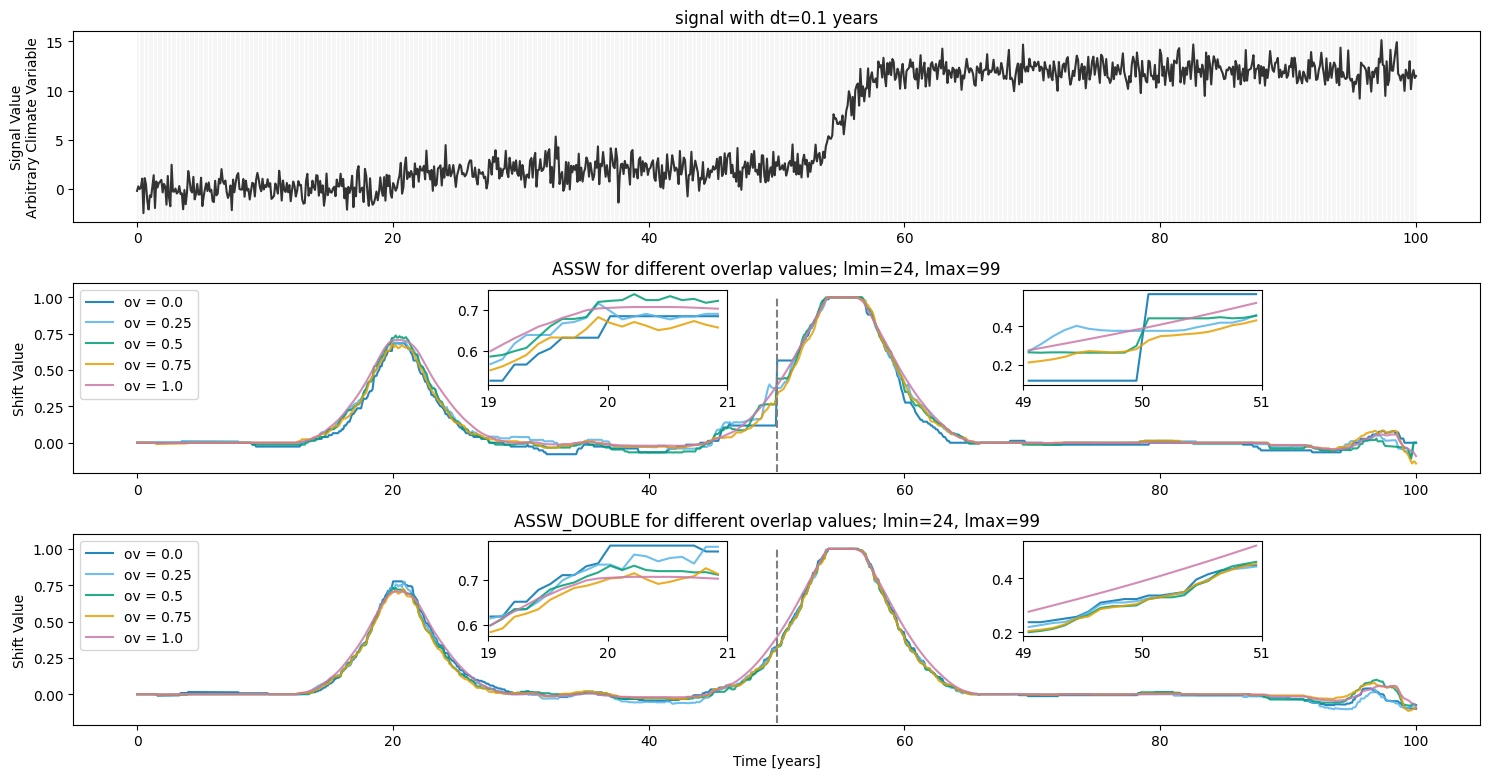

In [192]:
import toad 
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt

from toad.shifts.methods.asdetect import ASDETECT
from toad.shifts.methods.asswdetect import ASSWDETECT
from toad.shifts.methods.asswdetect_double import ASSWDETECT as ASSWDETECT_DOUBLE
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def shift(mag, t, t0):
    return mag * (1/(1 + np.exp(-(t-t0))))

dt = 0.1
Tmax = 100 # years
nT = int(Tmax/dt) # number of gridpoints in time
overlap = np.arange(0,1.1,0.25)
lmin, lmax = 24, 99

# Use distinct, colorblind-friendly colors
colors = [
    "#0072B2", # dark blue
    "#56B4E9", # blue
    "#009E73", # green
    "#E69F00", # orange
    "#CC79A7", # purple
]
linewidth = 1.5

# SIGNAL GENERATION =======================================================
noise = np.random.normal(size=nT)
time = np.linspace(0,Tmax, nT)

signal = (noise 
            + shift(10, time, 55)
            + shift(2,time,20)   
        )

# PLOT: SIGNAL ============================================================
fig = plt.figure(figsize=(15, 15))
gs = fig.add_gridspec(ncols=1, nrows=6)
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(time, signal, color="#333333")
for t in time:
    ax1.axvline(t, color='grey', alpha=0.1, lw=0.5, zorder=-1)
ax1.set_title(f'signal with dt={dt} years')
ax1.set_ylabel('Signal Value\nArbitrary Climate Variable')

# PLOT: Sliding Window ==================================================
ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)
for i, ov in enumerate(overlap):
    color = colors[i % len(colors)]
    detector = ASSWDETECT(
        lmin=lmin,
        lmax=lmax,
        overlap=ov
    )
    dts = detector.fit_predict(
        signal,
        time,
    )
    ax2.plot(time, dts, label=f'ov = {round(ov,2)}', alpha=0.85, color=color, linewidth=linewidth)

# INLAY PLOT 1: ==========================================================
area_min, area_max = Tmax*0.49, Tmax*0.51
inset_ax = inset_axes(ax2, width="17%", height="50%", bbox_to_anchor=(-0.15, 0, 1, 1), bbox_transform=ax2.transAxes)
center_mask = (time > area_min) & (time < area_max)
for i, ov in enumerate(overlap):
    color = colors[i % len(colors)]
    detector = ASSWDETECT(
        lmin=lmin,
        lmax=lmax,
        overlap=ov
    )
    dts = detector.fit_predict(
        signal,
        time,
    )
    inset_ax.plot(time[center_mask], dts[center_mask], alpha=0.85, color=color, linewidth=linewidth)
inset_ax.set_title("")
inset_ax.set_xlim(area_min, area_max)
inset_ax.set_xticks(np.arange(np.ceil(area_min), np.floor(area_max)+1, 1))

# INLAY PLOT 2: ==========================================================
area_min, area_max = Tmax*0.19, Tmax*0.21
inset_ax = inset_axes(ax2, width="17%", height="50%", bbox_to_anchor=(-0.53, 0, 1, 1), bbox_transform=ax2.transAxes)
center_mask = (time > area_min) & (time < area_max)
for i, ov in enumerate(overlap):
    color = colors[i % len(colors)]
    detector = ASSWDETECT(
        lmin=lmin,
        lmax=lmax,
        overlap=ov
    )
    dts = detector.fit_predict(
        signal,
        time,
    )
    inset_ax.plot(time[center_mask], dts[center_mask], alpha=0.85, color=color, linewidth=linewidth)
inset_ax.set_title("")
inset_ax.set_xlim(area_min, area_max)
inset_ax.set_xticks(np.arange(np.ceil(area_min), np.floor(area_max)+1, 1))

ax2.set_ylim(-0.21, 1.1)
ax2.vlines(x=Tmax//2, ymin=-0.2, ymax=1, color='grey', linestyles='--')
ax2.set_title(f'ASSW for different overlap values; lmin={lmin}, lmax={lmax}')
ax2.legend(loc='upper left')
ax2.set_ylabel('Shift Value')

# PLOT: Sliding Window Double =============================================
ax3 = fig.add_subplot(gs[2, 0], sharex=ax1)
for i, ov in enumerate(overlap):
    color = colors[i % len(colors)]
    detector = ASSWDETECT_DOUBLE(
        lmin=lmin,
        lmax=lmax,
        overlap=ov
    )
    dts = detector.fit_predict(
        signal,
        time,
        )

    ax3.plot(time, dts, label=f'ov = {round(ov,2)}', alpha=0.85, color=color, linewidth=linewidth)

# INLAY PLOT 1: ==========================================================
area_min, area_max = Tmax*0.49, Tmax*0.51
inset_ax = inset_axes(ax3, width="17%", height="50%", bbox_to_anchor=(-0.15, 0, 1, 1), bbox_transform=ax3.transAxes)
center_mask = (time > area_min) & (time < area_max)
for i, ov in enumerate(overlap):
    color = colors[i % len(colors)]
    detector = ASSWDETECT_DOUBLE(
        lmin=lmin,
        lmax=lmax,
        overlap=ov
    )
    dts = detector.fit_predict(
        signal,
        time,
    )
    inset_ax.plot(time[center_mask], dts[center_mask], alpha=0.85, color=color, linewidth=linewidth)
inset_ax.set_title("")
inset_ax.set_xlim(area_min, area_max)
inset_ax.set_xticks(np.arange(np.ceil(area_min), np.floor(area_max)+1, 1))

# INLAY PLOT 2: ==========================================================
area_min, area_max = Tmax*0.19, Tmax*0.21
inset_ax = inset_axes(ax3, width="17%", height="50%", bbox_to_anchor=(-0.53, 0, 1, 1), bbox_transform=ax3.transAxes)
center_mask = (time > area_min) & (time < area_max)
for i, ov in enumerate(overlap):
    color = colors[i % len(colors)]
    detector = ASSWDETECT_DOUBLE(
        lmin=lmin,
        lmax=lmax,
        overlap=ov
    )
    dts = detector.fit_predict(
        signal,
        time,
    )
    inset_ax.plot(time[center_mask], dts[center_mask], alpha=0.85, color=color, linewidth=linewidth)
inset_ax.set_title("")
inset_ax.set_xlim(area_min, area_max)
inset_ax.set_xticks(np.arange(np.ceil(area_min), np.floor(area_max)+1, 1))

ax3.set_ylim(-0.21, 1.1)
ax3.vlines(x=Tmax//2, ymin=-0.2, ymax=1, color='grey', linestyles='--')
ax3.set_title(f'ASSW_DOUBLE for different overlap values; lmin={lmin}, lmax={lmax}')
ax3.legend(loc='upper left')
ax3.set_xlabel('Time [years]')
ax3.set_ylabel('Shift Value')

# =======================================================================
plt.tight_layout()
plt.show()

/tmp/ipykernel_14296/2102141755.py:236: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


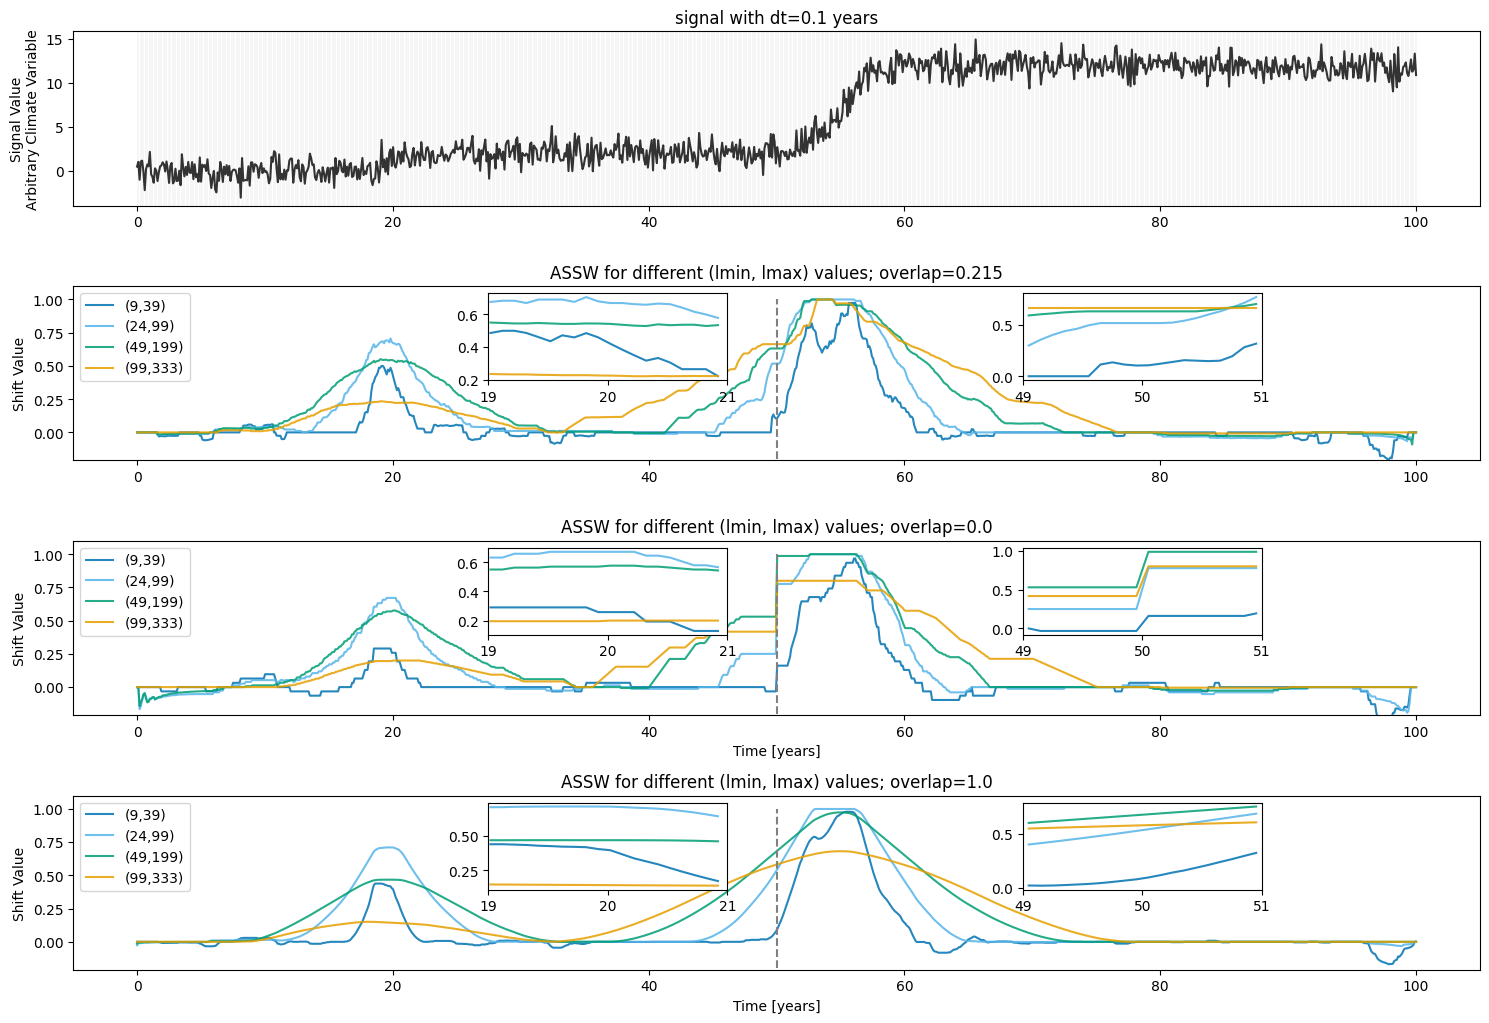

In [40]:
import toad 
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt

from toad.shifts.methods.asdetect import ASDETECT
from toad.shifts.methods.asswdetect import ASSWDETECT
from toad.shifts.methods.asswdetect_double import ASSWDETECT as ASSWDETECT_DOUBLE
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def shift(mag, t, t0):
    return mag * (1/(1 + np.exp(-(t-t0))))

dt = 0.1
Tmax = 100 # years
nT = int(Tmax/dt) # number of gridpoints in time
ov = 0.215
l_tuple = [(9,39),(24,99),(49,199),(99,333)]

# Use distinct, colorblind-friendly colors
colors = [
    "#0072B2", # dark blue
    "#56B4E9", # blue
    "#009E73", # green
    "#E69F00", # orange
    "#CC79A7", # purple
]
linewidth = 1.5

# SIGNAL GENERATION =======================================================
noise = np.random.normal(size=nT)
time = np.linspace(0,Tmax, nT)

signal = (noise 
            + shift(10, time, 55)
            + shift(2,time,20)   
        )

# PLOT: SIGNAL ============================================================
fig = plt.figure(figsize=(15, 15))
gs = fig.add_gridspec(ncols=1, nrows=6)
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(time, signal, color="#333333")
for t in time:
    ax1.axvline(t, color='grey', alpha=0.1, lw=0.5, zorder=-1)
ax1.set_title(f'signal with dt={dt} years')
ax1.set_ylabel('Signal Value\nArbitrary Climate Variable')

# PLOT: Sliding Window ==================================================
ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)
for i, (lmin, lmax) in enumerate(l_tuple):
    color = colors[i % len(colors)]
    detector = ASSWDETECT(
        lmin=lmin,
        lmax=lmax,
        overlap=ov,
    )
    dts = detector.fit_predict(
        signal,
        time,
    )
    ax2.plot(time, dts, label=f'({round(lmin,2)},{round(lmax,2)})', alpha=0.85, color=color, linewidth=linewidth)

# INLAY PLOT 1: ==========================================================
area_min, area_max = Tmax*0.49, Tmax*0.51
inset_ax = inset_axes(ax2, width="17%", height="50%", bbox_to_anchor=(-0.15, 0, 1, 1), bbox_transform=ax2.transAxes)
center_mask = (time > area_min) & (time < area_max)
for i, (lmin, lmax) in enumerate(l_tuple):
    color = colors[i % len(colors)]
    detector = ASSWDETECT(
        lmin=lmin,
        lmax=lmax,
        overlap=ov,
    )
    dts = detector.fit_predict(
        signal,
        time,
    )
    inset_ax.plot(time[center_mask], dts[center_mask], alpha=0.85, color=color, linewidth=linewidth)
inset_ax.set_title("")
inset_ax.set_xlim(area_min, area_max)
inset_ax.set_xticks(np.arange(np.ceil(area_min), np.floor(area_max)+1, 1))

# INLAY PLOT 2: ==========================================================
area_min, area_max = Tmax*0.19, Tmax*0.21
inset_ax = inset_axes(ax2, width="17%", height="50%", bbox_to_anchor=(-0.53, 0, 1, 1), bbox_transform=ax2.transAxes)
center_mask = (time > area_min) & (time < area_max)
for i, (lmin, lmax) in enumerate(l_tuple):
    color = colors[i % len(colors)]
    detector = ASSWDETECT(
        lmin=lmin,
        lmax=lmax,
        overlap=ov,
    )
    dts = detector.fit_predict(
        signal,
        time,
    )
    inset_ax.plot(time[center_mask], dts[center_mask], alpha=0.85, color=color, linewidth=linewidth)
inset_ax.set_title("")
inset_ax.set_xlim(area_min, area_max)
inset_ax.set_xticks(np.arange(np.ceil(area_min), np.floor(area_max)+1, 1))

ax2.set_ylim(-0.21, 1.1)
ax2.vlines(x=Tmax//2, ymin=-0.2, ymax=1, color='grey', linestyles='--')
ax2.set_title(f'ASSW for different (lmin, lmax) values; overlap={ov}')
ax2.legend(loc='upper left')
ax2.set_ylabel('Shift Value')

# PLOT: Sliding Window ov = 0.0 =============================================
ax3 = fig.add_subplot(gs[2, 0], sharex=ax1)
for i, (lmin, lmax) in enumerate(l_tuple):
    color = colors[i % len(colors)]
    detector = ASSWDETECT(
        lmin=lmin,
        lmax=lmax,
        overlap=0.0,
    )
    dts = detector.fit_predict(
        signal,
        time,
        )

    ax3.plot(time, dts, label=f'({round(lmin,2)},{round(lmax,2)})', alpha=0.85, color=color, linewidth=linewidth)

# INLAY PLOT 1: ==========================================================
area_min, area_max = Tmax*0.49, Tmax*0.51
inset_ax = inset_axes(ax3, width="17%", height="50%", bbox_to_anchor=(-0.15, 0, 1, 1), bbox_transform=ax3.transAxes)
center_mask = (time > area_min) & (time < area_max)
for i, (lmin, lmax) in enumerate(l_tuple):
    color = colors[i % len(colors)]
    detector = ASSWDETECT(
        lmin=lmin,
        lmax=lmax,
        overlap=0.0,
    )
    dts = detector.fit_predict(
        signal,
        time,
    )
    inset_ax.plot(time[center_mask], dts[center_mask], alpha=0.85, color=color, linewidth=linewidth)
inset_ax.set_title("")
inset_ax.set_xlim(area_min, area_max)
inset_ax.set_xticks(np.arange(np.ceil(area_min), np.floor(area_max)+1, 1))

# INLAY PLOT 2: ==========================================================
area_min, area_max = Tmax*0.19, Tmax*0.21
inset_ax = inset_axes(ax3, width="17%", height="50%", bbox_to_anchor=(-0.53, 0, 1, 1), bbox_transform=ax3.transAxes)
center_mask = (time > area_min) & (time < area_max)
for i, (lmin, lmax) in enumerate(l_tuple):
    color = colors[i % len(colors)]
    detector = ASSWDETECT(
        lmin=lmin,
        lmax=lmax,
        overlap=0.0,
    )
    dts = detector.fit_predict(
        signal,
        time,
    )
    inset_ax.plot(time[center_mask], dts[center_mask], alpha=0.85, color=color, linewidth=linewidth)
inset_ax.set_title("")
inset_ax.set_xlim(area_min, area_max)
inset_ax.set_xticks(np.arange(np.ceil(area_min), np.floor(area_max)+1, 1))

ax3.set_ylim(-0.21, 1.1)
ax3.vlines(x=Tmax//2, ymin=-0.2, ymax=1, color='grey', linestyles='--')
ax3.set_title(f'ASSW for different (lmin, lmax) values; overlap={0.0}')
ax3.legend(loc='upper left')
ax3.set_xlabel('Time [years]')
ax3.set_ylabel('Shift Value')

# PLOT: Sliding Window ov = 1.0 =============================================
ax4 = fig.add_subplot(gs[3, 0], sharex=ax1)
for i, (lmin, lmax) in enumerate(l_tuple):
    color = colors[i % len(colors)]
    detector = ASSWDETECT(
        lmin=lmin,
        lmax=lmax,
        overlap=1.0,
    )
    dts = detector.fit_predict(
        signal,
        time,
    )
    ax4.plot(time, dts, label=f'({round(lmin,2)},{round(lmax,2)})', alpha=0.85, color=color, linewidth=linewidth)

# INLAY PLOT 1: ==========================================================
area_min, area_max = Tmax*0.49, Tmax*0.51
inset_ax = inset_axes(ax4, width="17%", height="50%", bbox_to_anchor=(-0.15, 0, 1, 1), bbox_transform=ax4.transAxes)
center_mask = (time > area_min) & (time < area_max)
for i, (lmin, lmax) in enumerate(l_tuple):
    color = colors[i % len(colors)]
    detector = ASSWDETECT(
        lmin=lmin,
        lmax=lmax,
        overlap=1.0,
    )
    dts = detector.fit_predict(
        signal,
        time,
    )
    inset_ax.plot(time[center_mask], dts[center_mask], alpha=0.85, color=color, linewidth=linewidth)
inset_ax.set_title("")
inset_ax.set_xlim(area_min, area_max)
inset_ax.set_xticks(np.arange(np.ceil(area_min), np.floor(area_max)+1, 1))

# INLAY PLOT 2: ==========================================================
area_min, area_max = Tmax*0.19, Tmax*0.21
inset_ax = inset_axes(ax4, width="17%", height="50%", bbox_to_anchor=(-0.53, 0, 1, 1), bbox_transform=ax4.transAxes)
center_mask = (time > area_min) & (time < area_max)
for i, (lmin, lmax) in enumerate(l_tuple):
    color = colors[i % len(colors)]
    detector = ASSWDETECT(
        lmin=lmin,
        lmax=lmax,
        overlap=1.0,
    )
    dts = detector.fit_predict(
        signal,
        time,
    )
    inset_ax.plot(time[center_mask], dts[center_mask], alpha=0.85, color=color, linewidth=linewidth)
inset_ax.set_title("")
inset_ax.set_xlim(area_min, area_max)
inset_ax.set_xticks(np.arange(np.ceil(area_min), np.floor(area_max)+1, 1))

ax4.set_ylim(-0.21, 1.1)
ax4.vlines(x=Tmax//2, ymin=-0.2, ymax=1, color='grey', linestyles='--')
ax4.set_title(f'ASSW for different (lmin, lmax) values; overlap={1.0}')
ax4.legend(loc='upper left')
ax4.set_xlabel('Time [years]')
ax4.set_ylabel('Shift Value')

# =======================================================================
plt.tight_layout()
plt.show()

## Compare Cluster Run Time Data

In [68]:
import numpy as np
import pandas as pd

# import csv-file
fp = "data_time/sw_time_05.csv"
data = pd.read_csv(fp)

# display first rows
data.head()

method  run  overlap        time
0  ASDETECT    1      NaN  122.775327
1  ASDETECT    2      NaN  122.468312
2  ASDETECT    3      NaN  122.576857
3  ASDETECT    4      NaN  122.469124
4  ASDETECT    5      NaN  122.637876

In [69]:
# group data by 'method' and 'overlap', include 'NaN' as a overlap-value
grouped = data.groupby(['method', 'overlap'], dropna=False)
# calculate mean and std for each group
summary = grouped.agg({'time': ['mean', 'std']}).reset_index()
# flatten MultiIndex columns
summary.columns = ['method', 'overlap', 'mean_time', 'std_time']
# display the summary
display(summary)

overlaps = summary['overlap'].unique()[1:]
ASDETECT_time = summary.loc[summary['method'] == 'ASDETECT', 'mean_time'].values[0]
ASSWDETECT_time = summary[summary['method'] == 'ASSWDETECT']['mean_time'].values
ASSWDETECT_std = summary[summary['method'] == 'ASSWDETECT']['std_time'].values
ASSWDETECT_DOUBLE_time = summary[summary['method'] == 'ASSWDETECT_DOUBLE']['mean_time'].values
ASSWDETECT_DOUBLE_std = summary[summary['method'] == 'ASSWDETECT_DOUBLE']['std_time'].values

method  overlap    mean_time  std_time
0            ASDETECT      NaN   122.611618  0.113190
1          ASSWDETECT      0.0   125.093550  0.147898
2          ASSWDETECT      0.1   133.024432  0.104356
3          ASSWDETECT      0.2   149.202833  0.201474
4          ASSWDETECT      0.3   166.940558  0.187722
5          ASSWDETECT      0.4   192.712248  0.165946
6          ASSWDETECT      0.5   229.888426  0.110223
7          ASSWDETECT      0.6   278.794005  0.105646
8          ASSWDETECT      0.7   355.982197  0.225188
9          ASSWDETECT      0.8   520.421291  0.321444
10         ASSWDETECT      0.9   936.879323  0.443740
11  ASSWDETECT_DOUBLE      0.0   247.527516  0.185305
12  ASSWDETECT_DOUBLE      0.1   262.460176  0.101629
13  ASSWDETECT_DOUBLE      0.2   294.913738  0.199253
14  ASSWDETECT_DOUBLE      0.3   330.264410  0.187454
15  ASSWDETECT_DOUBLE      0.4   381.689494  0.244062
16  ASSWDETECT_DOUBLE      0.5   456.365622  0.338341
17  ASSWDETECT_DOUBLE      0.6   555.034696  0.118666
18  ASSWDETECT_DOUBLE      0.7   710.078648  0.425502
19  ASSWDETECT_DOUBLE      0.8  1039.901873  0.585737
20  ASSWDETECT_DOUBLE      0.9  1878.696839  0.720731

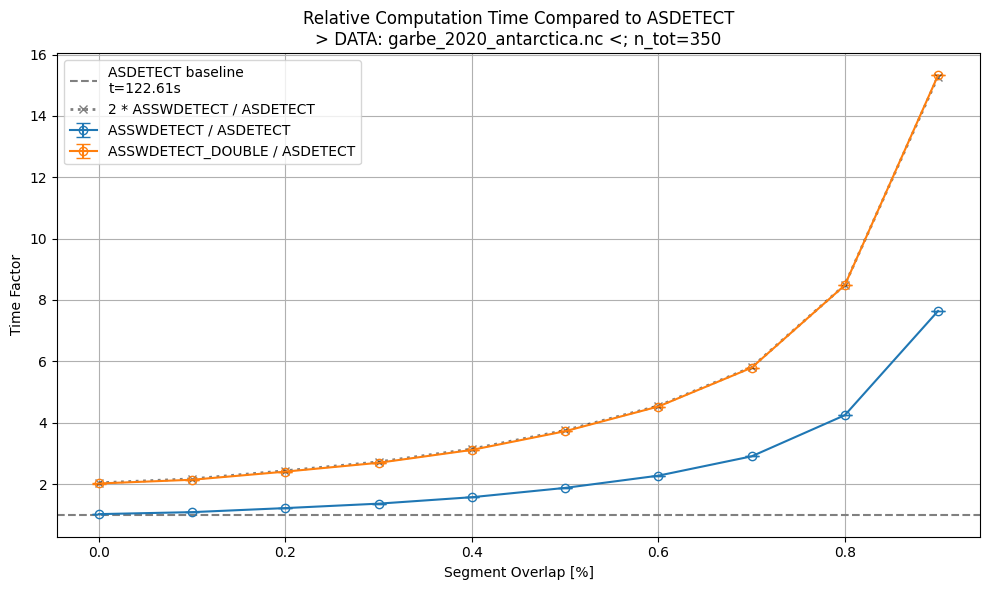

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.axhline(y=1, color='grey', linestyle='--', label=f'ASDETECT baseline\nt={ASDETECT_time:.2f}s')

plt.errorbar(
    overlaps,
    ASSWDETECT_time / ASDETECT_time,
    yerr=ASSWDETECT_std / ASDETECT_time,
    label='ASSWDETECT / ASDETECT',
    capsize=5,
    marker='o',
    markerfacecolor='none',
)
plt.errorbar(
    overlaps,
    ASSWDETECT_DOUBLE_time / ASDETECT_time,
    yerr=ASSWDETECT_DOUBLE_std / ASDETECT_time,
    label='ASSWDETECT_DOUBLE / ASDETECT',
    capsize=5,
    marker='o',
    markerfacecolor='none',
)

plt.plot(
    overlaps,
    2 * ASSWDETECT_time / ASDETECT_time,
    label='2 * ASSWDETECT / ASDETECT',
    alpha=0.5,
    color='black',
    linewidth=2,
    linestyle=':',
    marker='x',
)

plt.xlabel('Segment Overlap [%]')
plt.ylabel('Time Factor')
plt.title('Relative Computation Time Compared to ASDETECT\n> DATA: garbe_2020_antarctica.nc <; n_tot=350')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [12]:
import numpy as np
import pandas as pd

# import csv-file
fp2 = "data_time/sw_time_06.csv"
data2 = pd.read_csv(fp2)

# display first rows
data2.head()

method  run  overlap   limits       time
0  ASDETECT    1      NaN  (5, 15)  37.467101
1  ASDETECT    2      NaN  (5, 15)  37.411705
2  ASDETECT    3      NaN  (5, 15)  37.483919
3  ASDETECT    4      NaN  (5, 15)  37.505102
4  ASDETECT    5      NaN  (5, 15)  37.463121

In [25]:
# group data by 'method' and 'overlap', include 'NaN' as a overlap-value
grouped2 = data2.groupby(['method', 'limits'], dropna=False)
# calculate mean and std for each group
summary2 = grouped2.agg({'time': ['mean', 'std']}).reset_index()
# flatten MultiIndex columns
summary2.columns = ['method', 'limits', 'mean_time', 'std_time']
# sort out rows where limits is (35,116)
summary2 = summary2[summary2['limits'] != '(35, 116)']
# sort values by lowest lmin first, then lmax
summary2['lmin'] = summary2['limits'].apply(lambda x: int(x.strip('()').split(',')[0]))
summary2['lmax'] = summary2['limits'].apply(lambda x: int(x.strip('()').split(',')[1]))
summary2 = summary2.sort_values(by=['lmin', 'lmax']).reset_index(drop=True)
summary2 = summary2.drop(columns=['lmin', 'lmax'])
# display the summary
display(summary2)

limits2 = summary2['limits'].unique()
ASDETECT_time_base2 = summary2.loc[summary2['method'] == 'ASDETECT', 'mean_time'].values[0]
ASDETECT_time2 = summary2.loc[summary2['method'] == 'ASDETECT', 'mean_time'].values
ASSWDETECT_time2 = summary2[summary2['method'] == 'ASSWDETECT']['mean_time'].values
ASSWDETECT_std2 = summary2[summary2['method'] == 'ASSWDETECT']['std_time'].values
ASSWDETECT_DOUBLE_time2 = summary2[summary2['method'] == 'ASSWDETECT_DOUBLE']['mean_time'].values
ASSWDETECT_DOUBLE_std2 = summary2[summary2['method'] == 'ASSWDETECT_DOUBLE']['std_time'].values

method    limits    mean_time  std_time
0           ASDETECT   (5, 15)    37.448044  0.037079
1         ASSWDETECT   (5, 15)   329.536666  0.103219
2  ASSWDETECT_DOUBLE   (5, 15)   663.059582  0.165874
3           ASDETECT   (8, 35)    51.145239  0.052337
4         ASSWDETECT   (8, 35)   898.893003  0.746058
5  ASSWDETECT_DOUBLE   (8, 35)  1802.726911  0.439452
6           ASDETECT  (17, 70)    56.191854  0.078108
7         ASSWDETECT  (17, 70)  1939.309271  0.512415
8  ASSWDETECT_DOUBLE  (17, 70)  3896.662833  1.008766

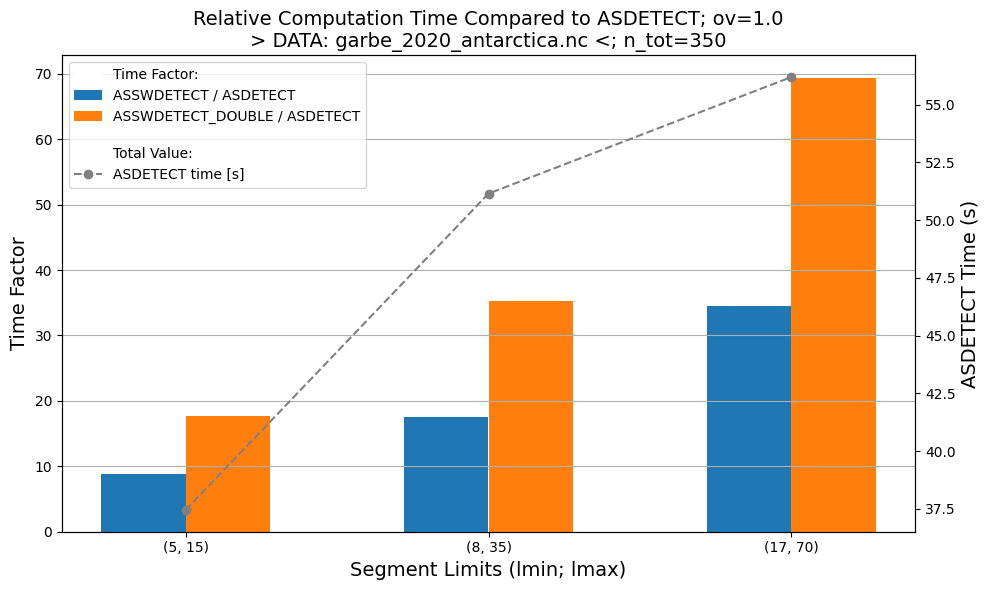

In [71]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(len(limits2))
width = 0.28

plt.figure(figsize=(10, 6))

line0, = plt.plot([], [], color='white', label='Time Factor:')  # invisible/empty line for annotation
bar1 = plt.bar(x - width/2, ASSWDETECT_time2 / ASDETECT_time2, width, 
    label='ASSWDETECT / ASDETECT', capsize=5)
bar2 = plt.bar(x + width/2, ASSWDETECT_DOUBLE_time2 / ASDETECT_time2, width, 
    label='ASSWDETECT_DOUBLE / ASDETECT', capsize=5)

plt.xticks(x, limits2)
plt.xlabel('Segment Limits (lmin; lmax)', fontsize=14)
plt.ylabel('Time Factor', fontsize=14)
plt.title('Relative Computation Time Compared to ASDETECT; ov=1.0\n> DATA: garbe_2020_antarctica.nc <; n_tot=350', fontsize=14)
plt.grid(axis='y')

ax = plt.gca()
ax2 = ax.twinx()
line1, = ax2.plot([], [], color='white', label='\nTotal Value:')  # invisible/empty line for annotation
line2, = ax2.plot(x, ASDETECT_time2, color='grey', marker='o', linestyle='--', label='ASDETECT time [s]')
ax2.set_ylabel('ASDETECT Time (s)', fontsize=14)

# Combine legends from both axes
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles1 + [line1] + [line2], labels1 + [line1.get_label()] + [line2.get_label()], loc='upper left')

plt.tight_layout()
plt.show()


## Gap Histogram

In [35]:
import toad 
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap

from toad.shifts.methods.asswdetect import ASSWDETECT as ASSWDETECT
from toad.shifts.methods.asswdetect_double import ASSWDETECT as ASSWDETECT_DOUBLE

def shift(mag, t, t0):
    return mag * (1/(1 + np.exp(-(t-t0))))

def make_hist(
        Tmax,
        method,
        ):
    # proved some space
    hist = np.full((Tmax,Tmax+1), -1)
    for T in range(15,Tmax+1):
        # SIGNAL GENERATION ============================================================
        noise = np.random.normal(size=T)
        time = np.linspace(0,T, T)
        signal = (noise 
                    + shift(10, time, T*0.55)
                    + shift(2,time,T*0.2)   
                )
        # APPLY DETECTOR METHOD ========================================================
        detector = method
        counter = detector.fit_predict(
            signal,
            time,
            return_gap=True,
            )
        # STORE RESULTS ================================================================
        counter[0] = 0
        counter[-1] = 0
        hist[:T,T] = counter

    return hist

def plot_hist(
        hist,
        ax,
        title,
        ):
    
    color_res = 4*256
    cmap_reds = matplotlib.colormaps['Reds']
    newcolors = cmap_reds(np.linspace(0, 1, color_res))
    grey = np.array([0.7, 0.7, 0.7, 1])
    ix = color_res//(hist.max()+1)
    newcolors = np.copy(newcolors)
    newcolors[:ix, :] = grey
    cmap_custom = ListedColormap(newcolors)
    
    im = ax.imshow(
        hist,
        aspect='auto',
        cmap=cmap_custom,
        origin='lower',
        )
    
    ax.set_xlabel('Time Series Length T', fontsize=16)
    ax.set_ylabel('Time Index', fontsize=16)
    ax.set_title(title, fontsize=16)
    cbar = plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.025, pad=0.04)
    cbar.set_label('Number of Hits', fontsize=16)
    cbar.ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

In [36]:
Tmax = 500 # years
overlap_arr = np.arange(0.1,0.41,0.05)
print(overlap_arr)

# make space for histograms
hist_arr = np.full((len(overlap_arr), Tmax, Tmax+1), -1)
for i, overlap in enumerate(overlap_arr):
    hist_arr[i] = make_hist(Tmax, ASSWDETECT_DOUBLE(overlap=overlap))

[0.1  0.15 0.2  0.25 0.3  0.35 0.4 ]


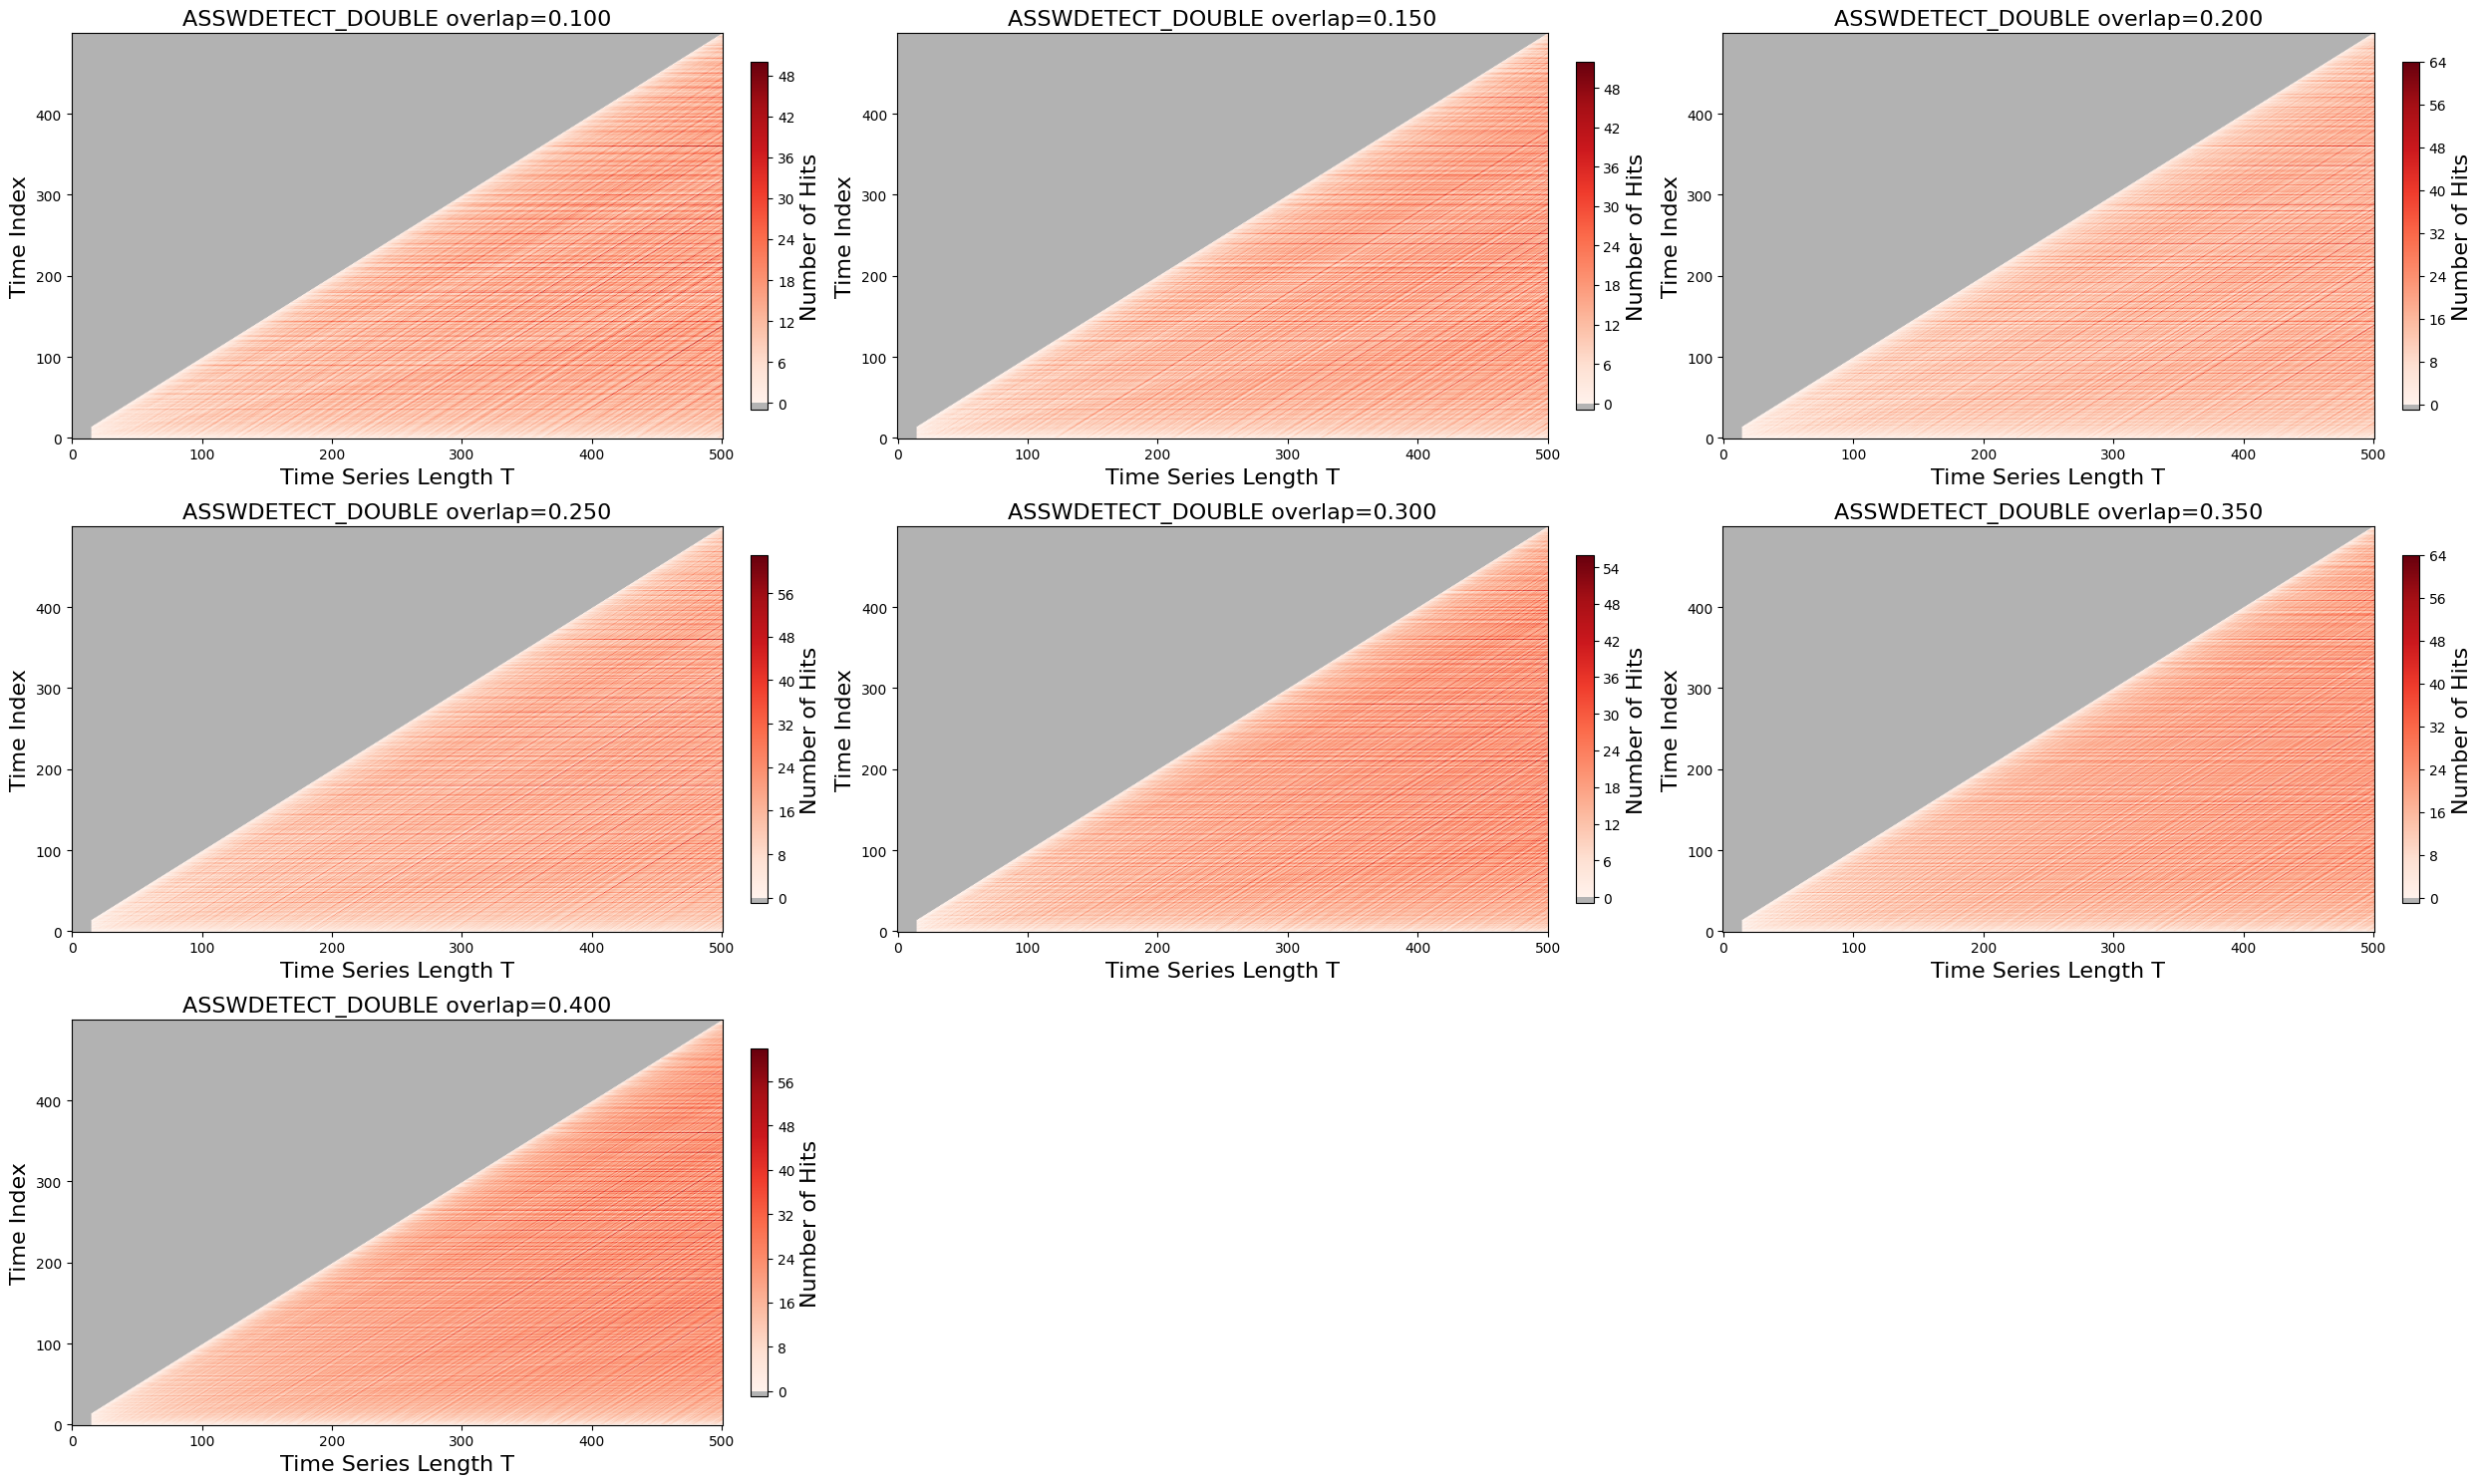

In [39]:
row_num = 3
col_num = 3
fig, axes = plt.subplots(row_num, col_num, figsize=(25, 15))

titles = []
for overlap in overlap_arr:
    titles.append(f"ASSWDETECT_DOUBLE overlap={overlap:.3f}")


axes = axes.flatten()
for i, ax in enumerate(axes):
    if i >= len(overlap_arr):
        ax.axis('off')
        continue
    plot_hist(hist_arr[i], ax, titles[i])

plt.tight_layout()
plt.show()

In [237]:
Tmax = 500 # years
overlap_arr = np.arange(0,1.1,0.1)
print(overlap_arr)

# make space for histograms
hist_arr = np.full((len(overlap_arr), Tmax, Tmax+1), -1)
for i, overlap in enumerate(overlap_arr):
    hist_arr[i] = make_hist(Tmax, ASSWDETECT_DOUBLE(overlap=overlap))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


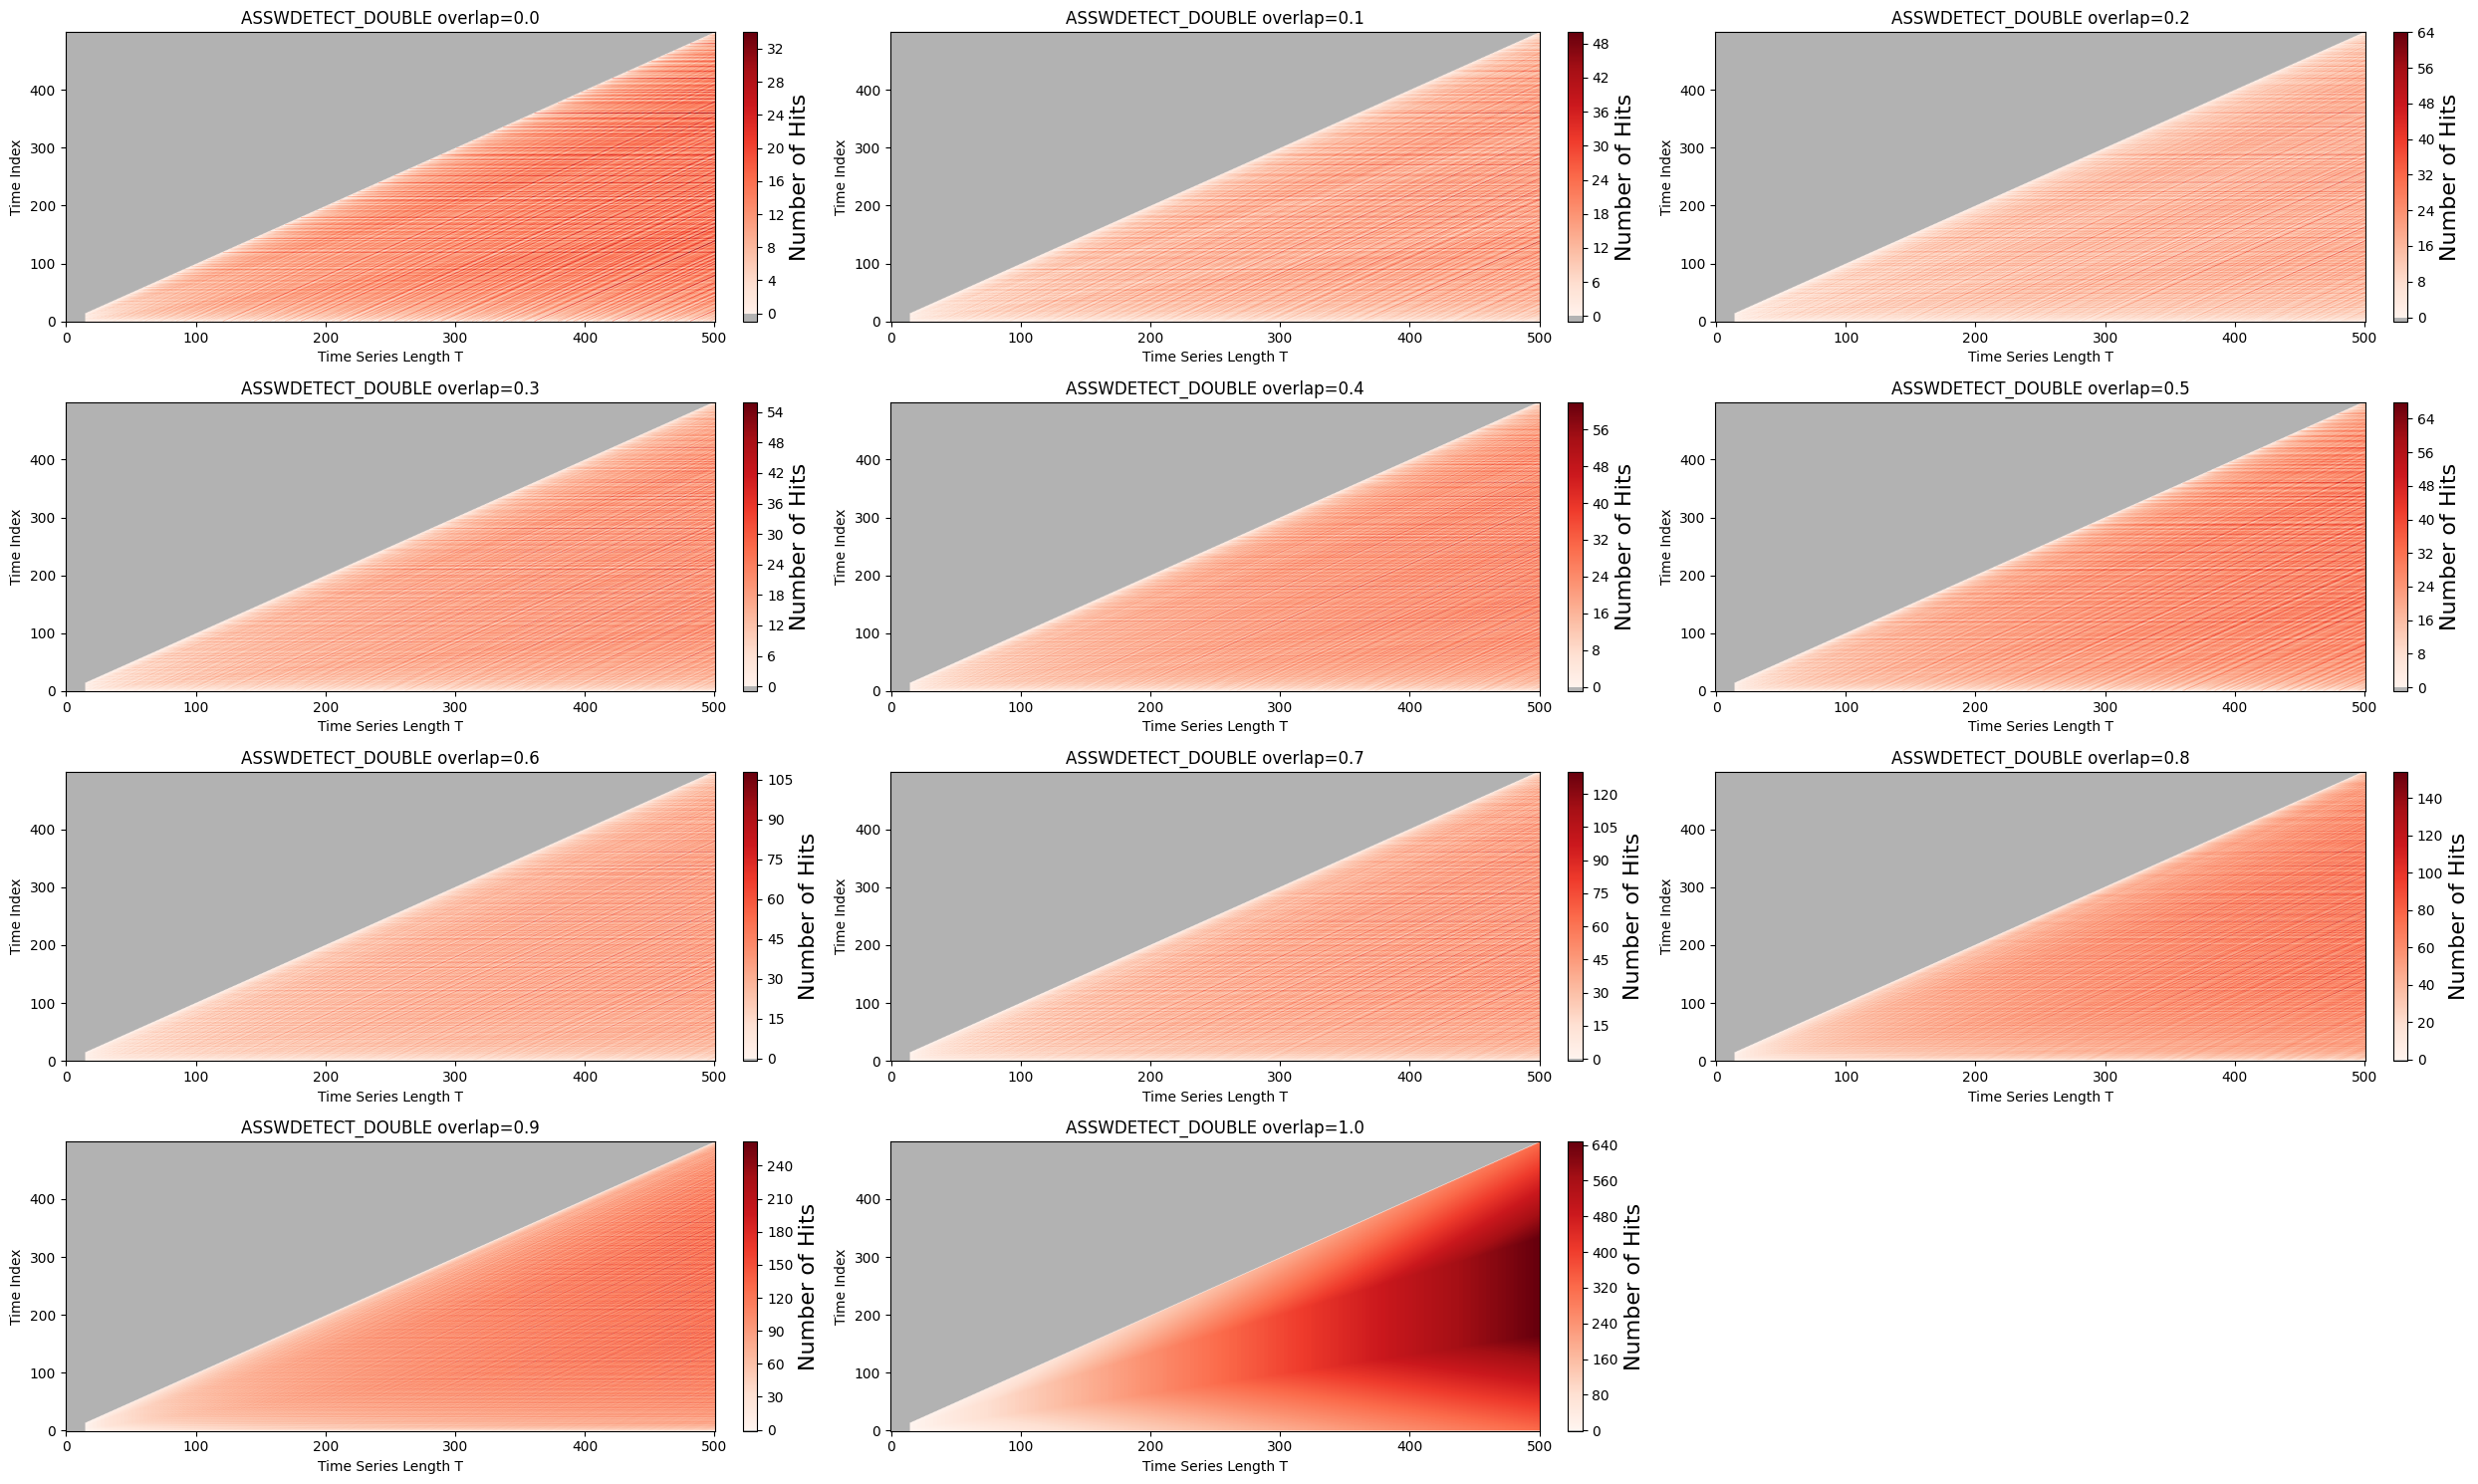

In [238]:
row_num = 4
col_num = 3
fig, axes = plt.subplots(row_num, col_num, figsize=(25, 15))

titles = [
    f"ASSWDETECT_DOUBLE overlap={0.0}",
    f"ASSWDETECT_DOUBLE overlap={0.1}",
    f"ASSWDETECT_DOUBLE overlap={0.2}",
    f"ASSWDETECT_DOUBLE overlap={0.3}",
    f"ASSWDETECT_DOUBLE overlap={0.4}",
    f"ASSWDETECT_DOUBLE overlap={0.5}",
    f"ASSWDETECT_DOUBLE overlap={0.6}",
    f"ASSWDETECT_DOUBLE overlap={0.7}",
    f"ASSWDETECT_DOUBLE overlap={0.8}",
    f"ASSWDETECT_DOUBLE overlap={0.9}",
    f"ASSWDETECT_DOUBLE overlap={1.0}"
]


axes = axes.flatten()
for i, ax in enumerate(axes):
    if i >= len(overlap_arr):
        ax.axis('off')
        continue
    plot_hist(hist_arr[i], ax, titles[i])

plt.tight_layout()
plt.show()

## Investigate Invariant Values

While preparing the github post to compare the methods, `ov = 0.25` and `ov = 0.75` seems to skip the center often. This hints to existing invariant ov values! Check for these!!! 

UPDATE: Turns out its nothing special about 0.25 or 0.75, BUT something special about `ov = 0.5` as this leads (again) to high values at the center.

## Compare Segment Length Sampling

While I was talking to Jonatha Krönke about this, him and me realized two things:

- given ov=1, longer segment sizes lead to a lower number of segments -> maybe less computation time?
- in the example plots above, it seems like focusing on shorter segment sizes lead to sharper AS detection

Questions:
- How much more computation times does SW with ov=1 need for different segment length foci? (cluster run already started)
- is this sharpness to segment length correlation actually true?

## Prepare GitHub Post

Important things to mention:

- explain ASSW and ASSW_DOUBLE
- show that ASSW contains  CS
- mention that symmetry was important when designing the methods
- switched from one normalization fits all -> to count occurrance of each value and normalize by that 

## Check Test Data

In [216]:
import pandas as pd

fp = "tutorials/test_data/garbe_2020_antarctica.nc"
ds = xr.open_dataset(fp)

display(ds)

<xarray.Dataset> Size: 102MB
Dimensions:  (time: 350, y: 190, x: 190)
Coordinates:
  * time     (time) int64 3kB 301 701 1101 1501 ... 138701 139101 139501 139901
  * x        (x) float64 2kB -3.032e+06 -3e+06 ... 2.984e+06 3.016e+06
  * y        (y) float64 2kB -3.032e+06 -3e+06 ... 2.984e+06 3.016e+06
    lat      (y, x) float64 289kB ...
    lon      (y, x) float64 289kB ...
Data variables:
    thk      (time, y, x) float32 51MB ...
    thk_dts  (time, y, x) float32 51MB ...
Attributes: (12/13)
    CDI:            Climate Data Interface version 1.9.6 (http://mpimet.mpg.d...
    proj4:          +lon_0=0.0 +ellps=WGS84 +datum=WGS84 +lat_ts=-71.0 +proj=...
    CDO:            Climate Data Operators version 1.9.6 (http://mpimet.mpg.d...
    source:         PISM (development v1.0-535-gb3de48787 committed by Julius...
    institution:    PIK / Potsdam Institute for Climate Impact Research
    author:         Julius Garbe (julius.garbe@pik-potsdam.de)
    ...             ...
    title:          Antarctic ice thickness evolution for the quasi-static re...
    Conventions:    CF-1.9
    projection:     Polar Stereographic South (71S,0E)
    ice_density:    910. kg m-3
    NCO:            netCDF Operators version 4.7.8 (Homepage = http://nco.sf....
    Modifications:  Modified by Jakob Harteg (jakob.harteg@pik-potsdam.de) No...

Map the lmin, lmax values from the examples above to the time-series length of the test data set.

In [221]:
print(9/1000*350)
print(39/1000*350)
print("=======")
print(24/1000*350)
print(99/1000*350)
print("=======")
print(49/1000*350)
print(199/1000*350)
print("=======")
print(99/1000*350)
print(333/1000*350)

3.15
13.65
8.4
34.65
17.150000000000002
69.65
34.65
116.55000000000001
